In [108]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
model_base = RetirementClass(name='baseline')
model_base.solve()
model_base.simulate()

In [33]:
model_ra = RetirementClass(name='increase_Rage', oap_age=66, two_year=63, erp_age=61)
model_ra.solve()
model_ra.simulate()

In [112]:
model_tax = RetirementClass(name='fradrag', fradrag=1.0)
model_tax.solve()
model_tax.simulate()

In [113]:
model_base.save()
model_ra.save()
model_tax.save()

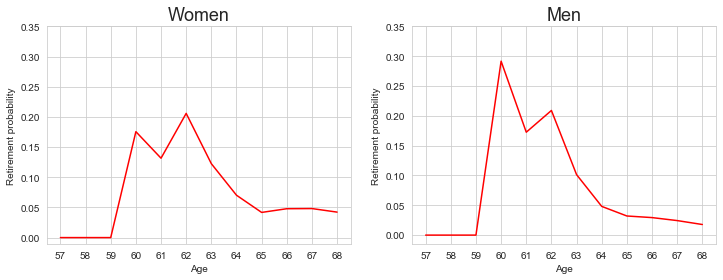

In [116]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_base,axs[0],male=0,states=[0,1,2,3])
figs.retirement_probs(model_base,axs[1],male=1,states=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

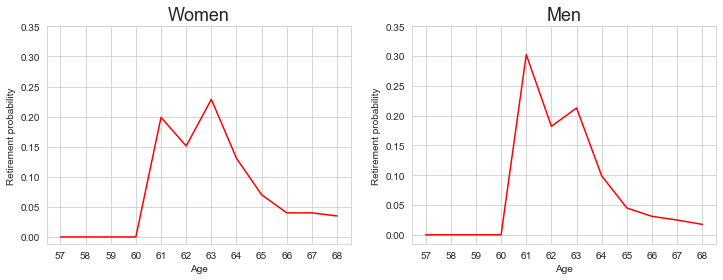

In [114]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_ra,axs[0],male=0,states=[0,1,2,3])
figs.retirement_probs(model_ra,axs[1],male=1,states=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

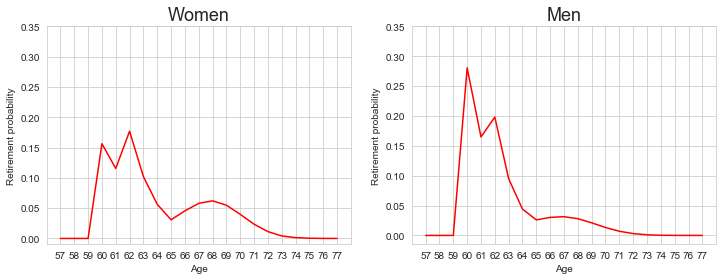

In [127]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(model_tax,axs[0],male=0,states=[0,1,2,3],ages=[57,77])
figs.retirement_probs(model_tax,axs[1],male=1,states=[0,1,2,3],ages=[57,77])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

### Percentage difference in retirement probabilities

In [117]:
ages,probs_base = figs.retirement_probs(model_base,None,male=0,states=[0,1,2,3],plot=False)
probs_ra = figs.retirement_probs(model_ra,None,male=0,states=[0,1,2,3],plot=False)[1]
probs_tax = figs.retirement_probs(model_tax,None,male=0,states=[0,1,2,3],plot=False)[1]

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


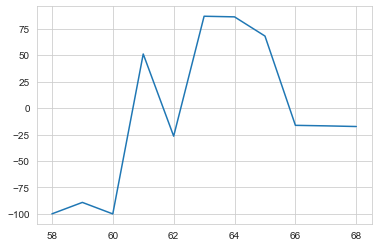

In [93]:
plt.plot(ages,(probs_ra/probs_base-1)*100)

C:\Users\Frederik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


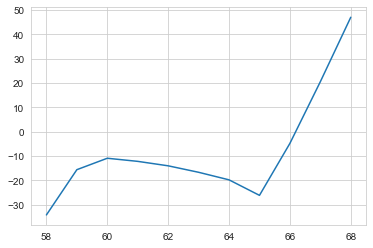

In [118]:
plt.plot(ages,(probs_tax/probs_base-1)*100)

### Actual difference in labor supply

In [119]:
import transitions
par_base = model_base.par
par_ra = model_ra.par
par_tax = model_tax.par
ages = [57,68]
x = np.arange(ages[0], ages[1]+1)
base = model_base.sim.d[transitions.inv_age(x,par_base)]
y_base = np.sum(base==1,axis=1)

ra = model_ra.sim.d[transitions.inv_age(x,par_ra)]
y_ra = np.sum(ra==1,axis=1)

tax = model_tax.sim.d[transitions.inv_age(x,par_tax)]
y_tax = np.sum(tax==1,axis=1)

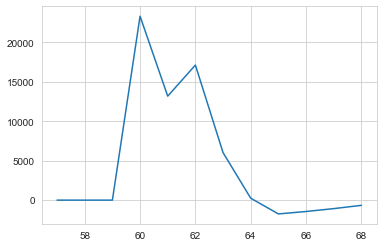

In [106]:
plt.plot(x,(y_ra-y_base))

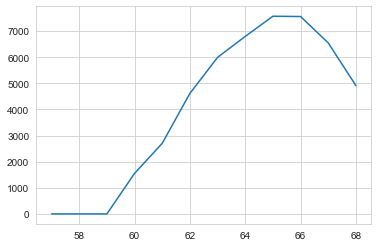

In [120]:
plt.plot(x,(y_tax-y_base))

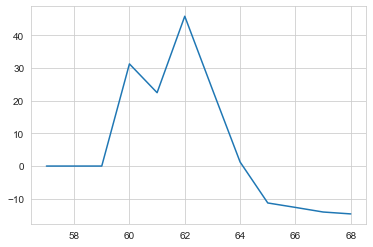

In [107]:
plt.plot(x,(y_ra/y_base-1)*100)

### Cumulative change in labor supply

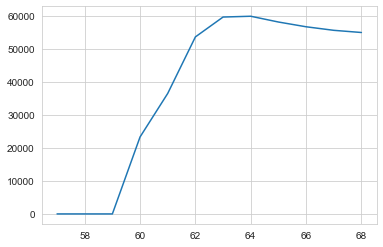

In [105]:
plt.plot(x,np.cumsum(y_ra-y_base))

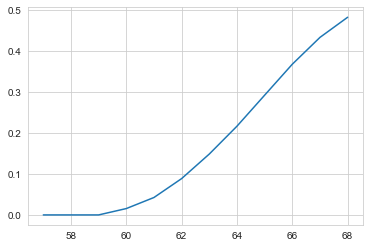

In [124]:
plt.plot(x,np.cumsum(y_tax-y_base)/par_base.simN)